In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Image Classifier without CNN
class SimpleImageClassifier:
    def __init__(self):
        # Load CIFAR-10 dataset and normalize
        (self.X_train, self.y_train), (self.X_test, self.y_test) = cifar10.load_data()
        self.X_train = self.X_train.reshape(len(self.X_train), -1) / 255.0
        self.X_test = self.X_test.reshape(len(self.X_test), -1) / 255.0

    # Visualize CIFAR-10 sample images
    def visualize_images(self, n=5):
        plt.figure(figsize=(10, 2))
        for i in range(n):
            plt.subplot(1, n, i+1)
            # Reshape the flattened images back to 32x32x3
            plt.imshow(self.X_train[i].reshape(32, 32, 3))
            plt.axis('off')
        plt.show()

    # Perform PCA for dimensionality reduction
    def pca_analysis(self, components=50):
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)

        pca = PCA(n_components=components)
        self.X_train_pca = pca.fit_transform(self.X_train_scaled)
        self.X_test_pca = pca.transform(self.X_test_scaled)

        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.xlabel('Components')
        plt.ylabel('Explained Variance')
        plt.title(f'PCA - Variance vs Components (Top {components})')
        plt.show()

    # Apply K-Nearest Neighbors (KNN) for classification
    def train_knn(self):
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(self.X_train_pca, self.y_train.ravel())
        y_pred = knn.predict(self.X_test_pca)
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"KNN Accuracy: {accuracy:.2f}")
        print(classification_report(self.y_test, y_pred))

    # Clustering with KMeans
    def clustering(self):
        cluster_labels = KMeans(n_clusters=10, random_state=42).fit_predict(self.X_train_pca)
        plt.scatter(self.X_train_pca[:, 0], self.X_train_pca[:, 1], c=cluster_labels, cmap='rainbow')
        plt.title('KMeans Clustering on CIFAR-10 Images (PCA Reduced)')
        plt.show()


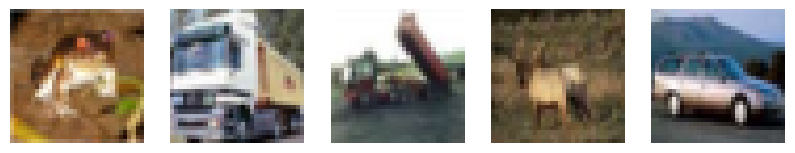

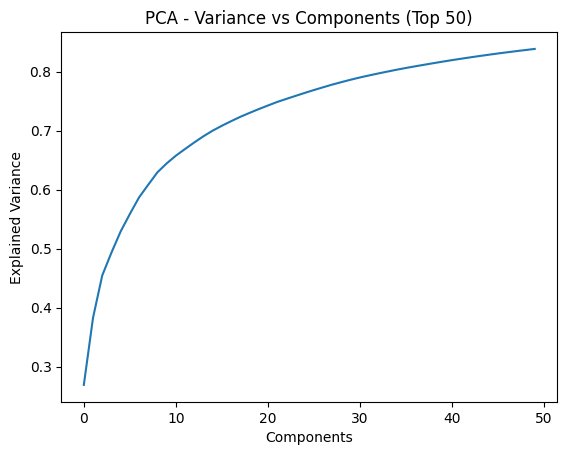

KNN Accuracy: 0.39
              precision    recall  f1-score   support

           0       0.39      0.59      0.47      1000
           1       0.57      0.39      0.46      1000
           2       0.27      0.44      0.33      1000
           3       0.32      0.22      0.26      1000
           4       0.28      0.42      0.34      1000
           5       0.47      0.25      0.33      1000
           6       0.35      0.43      0.39      1000
           7       0.59      0.32      0.41      1000
           8       0.49      0.59      0.54      1000
           9       0.66      0.28      0.39      1000

    accuracy                           0.39     10000
   macro avg       0.44      0.39      0.39     10000
weighted avg       0.44      0.39      0.39     10000



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


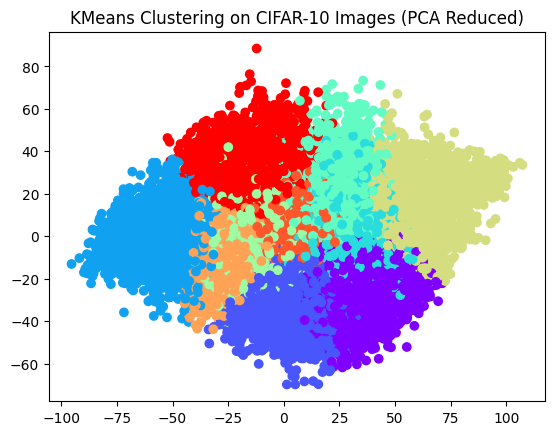

In [ ]:
# Main Execution
if __name__ == "__main__":
    classifier = SimpleImageClassifier()

    # Visualize sample images
    classifier.visualize_images()

    # Perform PCA analysis for dimensionality reduction
    classifier.pca_analysis(components=50)

    # Train KNN on PCA reduced features
    classifier.train_knn()

    # Perform KMeans clustering
    classifier.clustering()
